# Siggi Example

### Import necessary code from repo

In [1]:
import sys
sys.path.append('..')

In [2]:
from siggi import siggi, filters, spectra, calcIG, plotting
from siggi import Sed
from siggi.lsst_utils import BandpassDict
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Set up filter object and get example spectra

In [3]:
f = filters()
s = spectra()
red_spec = s.get_red_spectrum()
blue_spec = s.get_blue_spectrum()

### Define redshift prior

In [4]:
def prior_z(z, z0=0.5):
    return (z**2.)*np.exp(-(z/z0)**1.5)/(np.sum((np.arange(0, 2.51, .05)**2.)*np.exp(-(np.arange(0, 2.51, .05)/z0)**1.5)))

In [5]:
# Shows the total entropy for 2 SEDs with equal weighting
entropy = -1. * .5 * np.sum(prior_z(np.arange(0.05, 2.51, .05)) * np.log2(.5 * prior_z(np.arange(0.05, 2.51, .05))))
print(entropy*2.)

5.807147751224095


### Set up a siggi object with the SEDs, the SED weights, the prior, and the redshift binning defined.

In [6]:
sig_example = siggi([red_spec, blue_spec], [0.5, 0.5], prior_z,
                    z_min=0.05, z_max=2.5, z_steps=50)

### Can also include a set of filters that are static and not moved in the optimization

Here we use the LSST *ugrizy* filters

In [8]:
frozen_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../siggi/data/lsst_baseline_throughputs/')
# To make things more interesting we will just use the 'u' and 'g' filters.
frozen_dict = BandpassDict(frozen_dict.values()[:2], frozen_dict.keys()[:2])

### Run optimization

In [9]:
%%time
random_state = np.random.RandomState(17)
num_filters = 2
set_ratio = 1.0
res = sig_example.optimize_filters(num_filters=num_filters,
                                   filt_min=300., filt_max=1100.,
                                   set_ratio=set_ratio,
                                   system_wavelen_max=1200.,
                                   n_opt_points=25,
                                   optimizer_verbosity=10,
                                   procs=4, acq_func_kwargs_dict={'kappa':3},
                                   frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                                   starting_points = None,
                                   rand_state = random_state)

[(300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0)] [[300.0, 700.0, 700.0, 1100.0], [300.0, 500.0, 500.0, 700.0], [700.0, 900.0, 900.0, 1100.0], [354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353], [760.4823150024272, 810.0167168349087, 825.0668174206844, 929.5883679999306], [331.2503329510932, 348.0357442523083, 586.2508835868391, 1056.5465494547261], [340.95493249636297, 821.9348923725239, 991.2336828369688, 1001.8324209184242], [526.3905286855929, 686.8228994480016, 741.4010949079002, 778.0106025912407], [538.1805746414173, 616.8379488376213, 749.2071242610889, 930.9605677431197], [344.193080172659, 415.1231366202623, 420.72535553654166, 634.7875082767016]]


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.


[700.0, 900.0, 900.0, 1100.0] 2.5567931772680934
[354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353] 1.6511051313788103
[300.0, 500.0, 500.0, 700.0] 1.539997731332063
[300.0, 700.0, 700.0, 1100.0] 3.0407265055532706
[760.4823150024272, 810.0167168349087, 825.0668174206844, 929.5883679999306] 2.279682061897421


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   37.8s remaining:   37.8s


[331.2503329510932, 348.0357442523083, 586.2508835868391, 1056.5465494547261] 1.6110845114404473
[340.95493249636297, 821.9348923725239, 991.2336828369688, 1001.8324209184242] 1.6967196376817437
[526.3905286855929, 686.8228994480016, 741.4010949079002, 778.0106025912407] 2.4019451445325606


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   38.6s remaining:   16.5s


[344.193080172659, 415.1231366202623, 420.72535553654166, 634.7875082767016] 1.3318145202203509
[538.1805746414173, 616.8379488376213, 749.2071242610889, 930.9605677431197] 2.5967796834586223


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   50.9s finished


-3.0407265055532706 10
[509.2661267606679, 905.0595509364257] [[300.0, 300.0, 718.5322535213357, 718.5322535213357], [710.1191018728515, 710.1191018728514, 1100.0, 1100.0]]
4
[535.0689863332748, 736.8118295334457] [[300.0, 300.00000000000006, 770.1379726665496, 770.1379726665494], [473.9266699304422, 473.92666993044224, 999.6969891364491, 999.696989136449]]
[496.5123507301919, 887.698126861846] [[303.73388417986956, 303.7338841798696, 689.2908172805141, 689.2908172805141], [707.6131802760924, 707.6131802760924, 1067.7830734475997, 1067.7830734475997]]
7
[473.01724348767004, 842.3431710042073] [[369.6757511468395, 369.6757511468395, 576.3587358285006, 576.3587358285006], [715.7327925909921, 715.732792590992, 968.9535494174227, 968.9535494174227]]
8
Random Points Used: 0


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.


[300.0, 770.1379726665494, 473.9266699304422, 999.696989136449] 2.778450631780747


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   19.6s


[369.6757511468395, 576.3587358285006, 715.7327925909921, 968.9535494174227] 1.879042894034062
[303.73388417986956, 689.2908172805141, 707.6131802760924, 1067.7830734475997] 3.0190629413574532


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   19.9s remaining:   19.9s


[300.0, 718.5322535213357, 710.1191018728515, 1100.0] 3.0938240208485968


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   20.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   20.4s finished


-3.0938240208485968 14
[510.91605488604756, 976.3140546844508] [[302.9986071457997, 302.9986071457997, 718.8335026262954, 718.8335026262954], [957.6420603870363, 957.6420603870363, 994.9860489818652, 994.9860489818652]]
[507.18743798741764, 813.7868411871393] [[301.41354842499163, 301.41354842499163, 712.9613275498436, 712.9613275498436], [711.1545566250328, 711.1545566250329, 916.4191257492457, 916.4191257492457]]
[542.664980060986, 836.9454799227472] [[366.93071358332725, 366.9307135833272, 718.3992465386448, 718.3992465386448], [599.3024391903072, 599.3024391903073, 1074.588520655187, 1074.588520655187]]
4
[510.9159966446963, 923.8007382583877] [[302.99687464198826, 302.99687464198826, 718.8351186474043, 718.8351186474043], [869.201883855762, 869.201883855762, 978.3995926610133, 978.3995926610133]]
5
Random Points Used: 0


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.


[302.9986071457997, 718.8335026262954, 957.6420603870363, 994.9860489818652] 2.4257075348118207


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   16.5s


[302.99687464198826, 718.8351186474043, 869.201883855762, 978.3995926610133] 2.956978834374068


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   18.0s remaining:   18.0s


[366.93071358332725, 718.3992465386448, 599.3024391903072, 1074.588520655187] 2.9758375303989464
[301.41354842499163, 712.9613275498436, 711.1545566250328, 916.4191257492457] 3.005131612272231


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   18.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   18.6s finished


-3.0938240208485968 18
[511.31971588995646, 922.3072738351631] [[300.0, 300.0, 722.6394317799129, 722.6394317799129], [744.6145476703261, 744.6145476703261, 1100.0, 1100.0]]
[589.122924520922, 858.6498909800086] [[459.4255498367245, 459.42554983672454, 718.8202992051195, 718.8202992051193], [709.1474044809635, 709.1474044809636, 1008.1523774790537, 1008.1523774790537]]
[757.0901178019311, 403.9042482782651] [[552.7531132319442, 552.7531132319442, 961.427122371918, 961.427122371918], [366.5243050407639, 366.5243050407639, 441.2841915157662, 441.2841915157662]]
4
[511.4745583032268, 926.8331504028093] [[300.5837097108432, 300.5837097108432, 722.3654068956104, 722.3654068956104], [753.6663008056187, 753.6663008056187, 1100.0, 1100.0]]
6
[511.4238986536562, 929.3029546908838] [[300.78121855783917, 300.7812185578391, 722.0665787494731, 722.0665787494731], [758.6059093817677, 758.6059093817676, 1100.0, 1100.0]]
7
Random Points Used: 0


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.


[300.78121855783917, 722.0665787494731, 758.6059093817677, 1100.0] 3.125767662477262


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   18.2s


[459.4255498367245, 718.8202992051193, 709.1474044809635, 1008.1523774790537] 3.1057888575552277
[300.0, 722.6394317799129, 744.6145476703261, 1100.0] 3.1161865636529273
[300.5837097108432, 722.3654068956104, 753.6663008056187, 1100.0] 3.1267348948363307


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   18.7s remaining:   18.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   18.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   18.9s finished


-3.1267348948363307 22
[512.4512917768309, 939.7699869315495] [[304.4542450025939, 304.45424500259395, 720.4483385510678, 720.4483385510678], [779.5399738630989, 779.539973863099, 1100.0, 1100.0]]
[609.4482926173255, 990.6020224644923] [[353.0635765186142, 353.06357651861424, 865.8330087160367, 865.8330087160367], [881.2040449289846, 881.2040449289846, 1100.0, 1100.0]]
[608.2878880163757, 928.6747260982241] [[493.9499074843192, 493.9499074843193, 722.6258685484322, 722.6258685484322], [757.3494521964483, 757.3494521964483, 1100.0, 1100.0]]
4
[531.8658879937386, 858.510499677637] [[372.5379381252062, 372.5379381252062, 691.193837862271, 691.193837862271], [686.2835979513393, 686.2835979513393, 1030.7374014039347, 1030.7374014039347]]
5
Random Points Used: 0


[Parallel(n_jobs=4)]: Using backend MultiprocessingBackend with 4 concurrent workers.


[304.4542450025939, 720.4483385510678, 779.5399738630989, 1100.0] 3.126575035439917
[353.0635765186142, 865.8330087160367, 881.2040449289846, 1100.0] 2.8621544846089697
[372.5379381252062, 691.193837862271, 686.2835979513393, 1030.7374014039347] 3.008139084184339


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   18.7s remaining:   18.7s


[493.9499074843192, 722.6258685484322, 757.3494521964483, 1100.0] 3.1466045224057844


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   18.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   18.9s finished


-3.1466045224057844 26
CPU times: user 53.4 s, sys: 1.6 s, total: 55 s
Wall time: 2min 40s


### Find the best results

In [10]:
min_idx = np.argmin(res.yi)

In [11]:
best_pt = res.Xi[min_idx]

In [12]:
best_val = np.min(res.yi)

In [13]:
print(best_pt, best_val)

[493.9499074843192, 722.6258685484322, 757.3494521964483, 1100.0] -3.1466045224057844


### Plot with Siggi's plotting code

In [14]:
red_spec.redshiftSED(0.5)
blue_spec.redshiftSED(0.5)
sig_plot = plotting([red_spec, blue_spec], best_pt, set_ratio=1.0,
                    frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                    sed_mags=22.0)

#### Let's first make a plot of the new filters along with the filters we've frozen in place. For reference we'll also include the SEDs at redshift z=0.5.

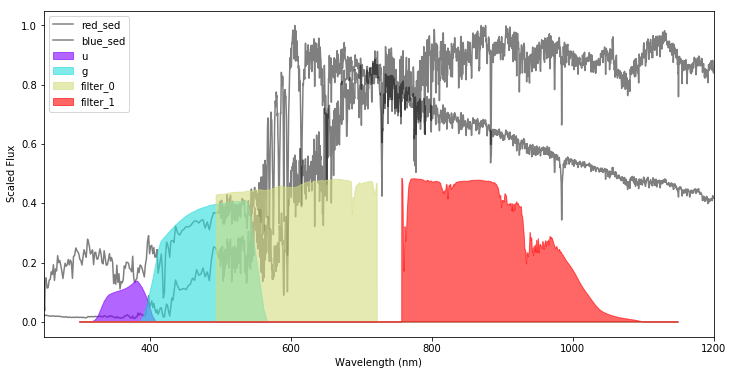

In [15]:
fig = sig_plot.plot_filters()
plt.legend(['red_sed', 'blue_sed'] + sig_plot.filter_dict.keys())

#### We can also look at a color-color plot of the new color values for each sed as it increases in redshift and the error bars on the colors

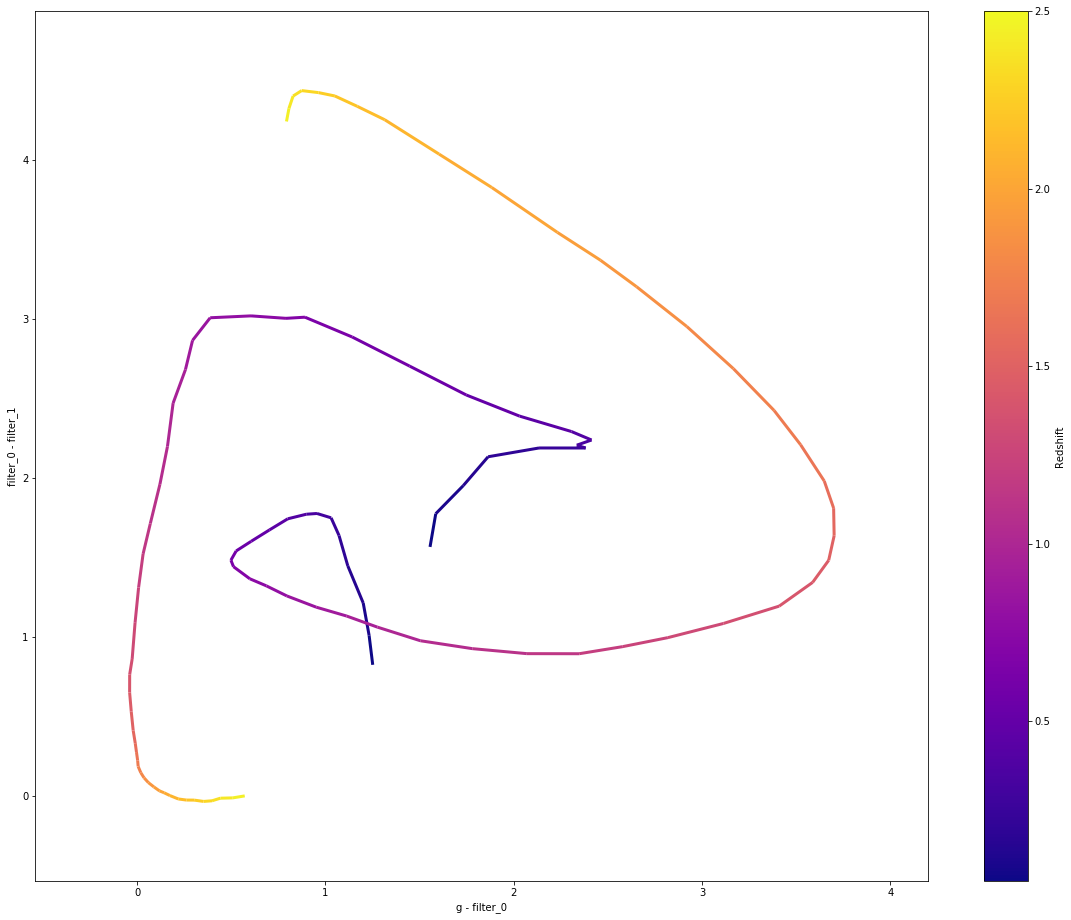

In [18]:
fig = plt.figure(figsize=(20,16))
fig = sig_plot.plot_color_color(['g', 'filter_0', 'filter_0', 'filter_1'],
                                np.linspace(0.05, 2.5, 50), fig=fig, include_err=False)

../siggi/siggiBase.py:199: RuntimeWarning: divide by zero encountered in double_scalars
  frac_a1 = half_area/a1
../siggi/siggiBase.py:200: RuntimeWarning: invalid value encountered in double_scalars
  length_ha = np.sqrt(frac_a1*(filt[1] - filt[0])**2.)


Text(0, 0.5, 'Filter 2 Center Wavelength (nm)')

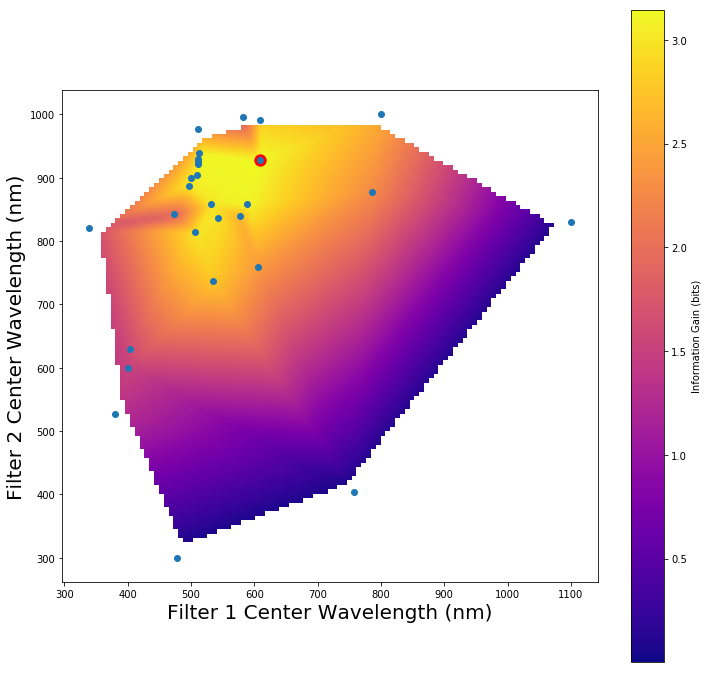

In [17]:
fig = plt.figure(figsize=(12,12))
xi, yi = sig_plot.plot_ig_space(res.Xi, np.abs(res.yi), [0,1], return_centers=True)
cbar = plt.colorbar()
cbar.set_label('Information Gain (bits)')
plt.scatter(best_pt[0] + (best_pt[1]-best_pt[0])/2., best_pt[2] + (best_pt[3]-best_pt[2])/2., c='r', s=128)
plt.scatter(xi, yi)
plt.xlabel('Filter 1 Center Wavelength (nm)', size=20)
plt.ylabel('Filter 2 Center Wavelength (nm)', size=20)